In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [350]:
def show_two_images(images_arr, size=(16, 8), mode='rgb', title_arr=(None,None)):    
    fig=plt.figure(figsize=size)
    
    for i in range(2):
        fig.add_subplot(1, 2, i+1)
        if mode=='grayscale':
            plt.imshow(images_arr[i], cmap='gray', vmin=0, vmax=255)
        else:
            plt.imshow(images_arr[i])
        plt.title(title_arr[i])
        plt.axis('off')

    plt.show()

In [352]:
orig_img_pil = Image.open(input("Enter original image path: "))
ref_img_pil = Image.open(input("Enter reference image path: "))

Enter original image path: orig.png
Enter reference image path: ref.png


In [353]:
orig_image = np.asarray(orig_img_pil)
ref_image = np.asarray(ref_img_pil)

In [354]:
def normilize_image(np_img, mul_const=1.0):
    return mul_const * (np_img-np_img.min()) / (np_img.max() - np_img.min())

# Опорный цвет

In [355]:
orig_vg = widgets.ColorPicker(
    concise=False,
    description='Original color',
    value='blue',
    disabled=False
)

ref_vg = widgets.ColorPicker(
    concise=False,
    description='Reference color',
    value='blue',
    disabled=False
)

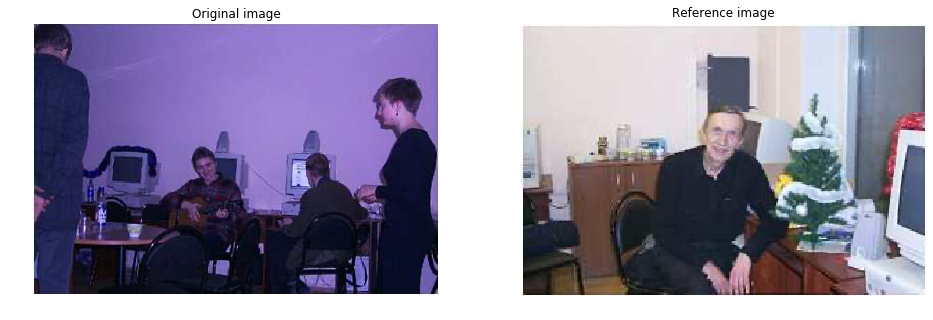

ColorPicker(value='blue', description='Original color')

ColorPicker(value='blue', description='Reference color')

In [356]:
show_two_images((orig_image, ref_image),title_arr=('Original image', 'Reference image') )

display(orig_vg)
display(ref_vg)

In [357]:
def hex_to_rgb(hex_color):
    RGB_color = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
    return RGB_color

def reference_color(np_img, orig_color, ref_color):
    R_const = ref_color[0] / orig_color[0]
    G_const = ref_color[1] / orig_color[1]
    B_const = ref_color[2] / orig_color[2]

    RGB_const = np.array([R_const, G_const, B_const])    
    scale_img = np.multiply(orig_image, RGB_const)
    
    return normilize_image(scale_img)

In [358]:
orig_hex = orig_vg.value.lstrip('#')
ref_hex = ref_vg.value.lstrip('#')

RGB_orig_color = hex_to_rgb(orig_hex)
RGB_ref_color = hex_to_rgb(ref_hex)

print('Original RGB =', RGB_orig_color)
print('Reference RGB =', RGB_ref_color)

Original RGB = (138, 113, 198)
Reference RGB = (233, 224, 222)


In [359]:
reference_color_img = reference_color(orig_image, RGB_orig_color, RGB_ref_color)

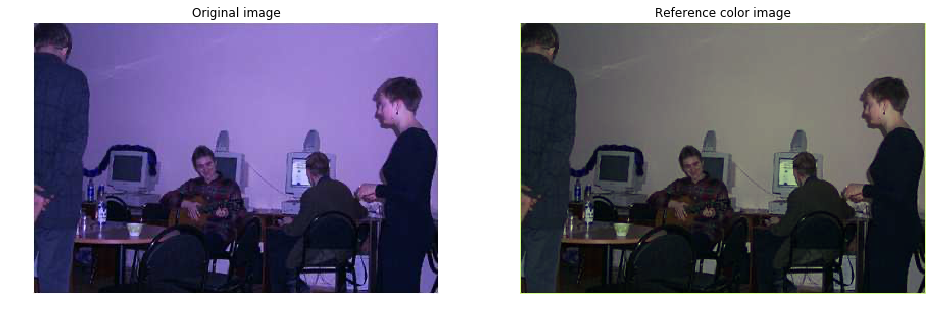

In [365]:
show_two_images((orig_image, reference_color_img),title_arr=('Original image', 'Reference color image'))

# Серый мир

In [361]:
def gray_world(np_img):
    r_mean = np.mean(np_img[:,:,0])
    g_mean = np.mean(np_img[:,:,1])
    b_mean = np.mean(np_img[:,:,2])

    avg = (r_mean + g_mean + b_mean) / 3
    
    temp_img = np.copy(np_img)

    for i, c_mean in enumerate([r_mean, g_mean, b_mean]):
        temp_img[:,:,i] = temp_img[:,:,i] * avg / c_mean
    
    return temp_img

In [362]:
gray_world_img = gray_world(orig_image)

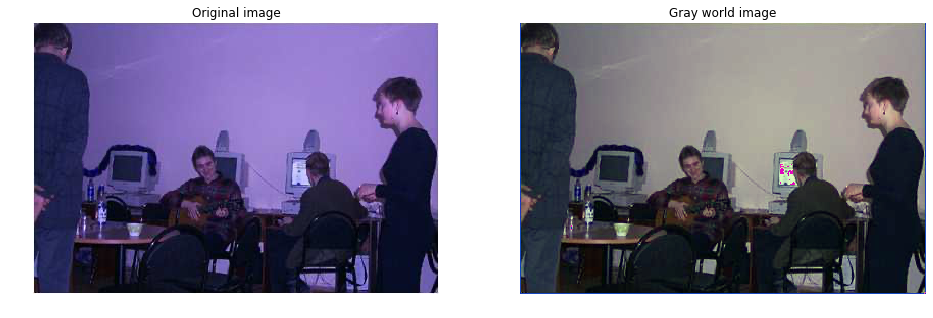

In [366]:
show_two_images((orig_image, gray_world_img),title_arr=('Original image', 'Gray world image'))

# Пока не понял, шо делать

# Коррекция на основе гистограммы

In [379]:
path = 'third_part.png'
img_pil = Image.open(path)
np_image = np.asarray(img_pil)
np_image_rgb = np.asarray(img_pil.convert('RGB'))

In [396]:
def plot_hist(np_img, color='black', title=None, show=True, yscale_type='linear'):
    histogram, bin_edges = np.histogram(
            np_img, bins=256, range=(0, 256)
    )
    plt.bar(bin_edges[0:-1], histogram, width=1.0, color=color)       
    
    plt.xlabel('brightness')
    plt.ylabel('number of pixels')

    plt.grid(True)
    plt.yscale(yscale_type)
    
    if title:
        fig.suptitle(title, fontsize=16)
    if show:
        plt.show()
        
def plot_hist_rgb(np_img, yscale_type='linear', title=None):
    columns = 3
    rows = 1
    
    fig=plt.figure(figsize=(20, 5), dpi=150)
    
    for i, c in enumerate(['r','g','b']):
        fig.add_subplot(1, 3, i+1)
        subtitle=c + ' channel'
        plot_hist(np_img, title=subtitle, show=False, color=c)
        
    plt.show()
    
def plot_two_hist_compare(np_img_arr, yscale_type='linear', title_arr=(None,None), figsize=(14, 6)):
    fig=plt.figure(figsize=figsize)
    
    for i in range(2):
        fig.add_subplot(1, 2, i+1)
        plot_hist(np_img_arr[i], title=title_arr[i], show=False)

    plt.show()



## 1. Нормализация

In [397]:
def normilize_image_rgb(np_img, mul_const=255.0):
    temp = np.zeros(np_img.shape, dtype='float')
    for i in range(3):
        temp[:,:,i] = normilize_image(np_img[:,:,i], mul_const)
    return temp.astype('int')

In [398]:
norm_img = normilize_image(np_image, 255.0)
norm_img_rgb = normilize_image_rgb(np_image_rgb, 255.0)

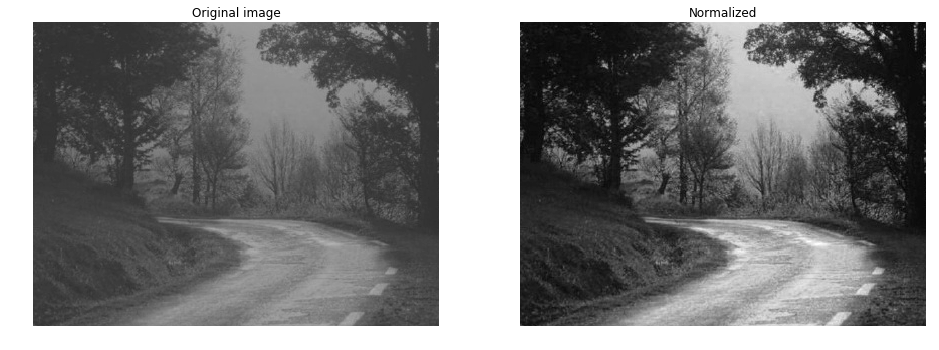

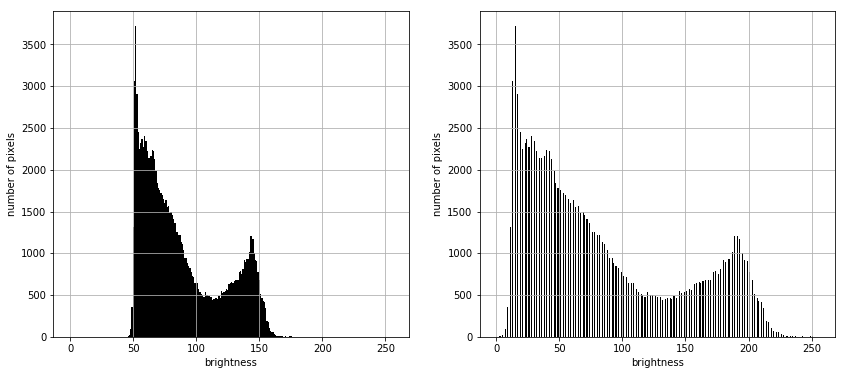

In [399]:
show_two_images((np_image, norm_img),title_arr=('Original image', 'Normalized'), mode='grayscale')
plot_two_hist_compare((np_image, norm_img), title_arr=('Original', 'Normalized'))

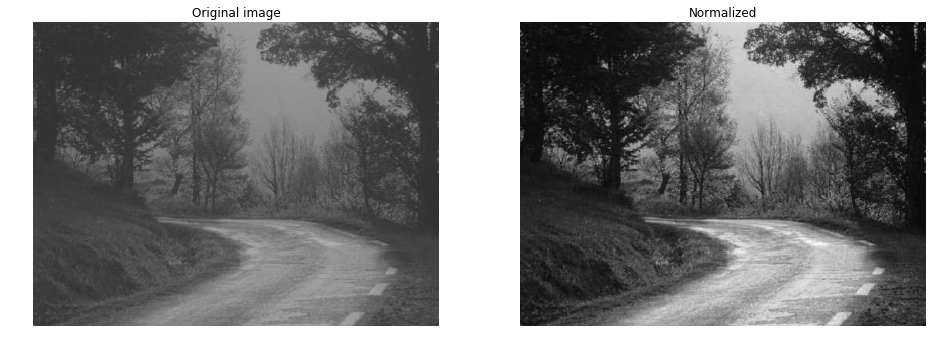

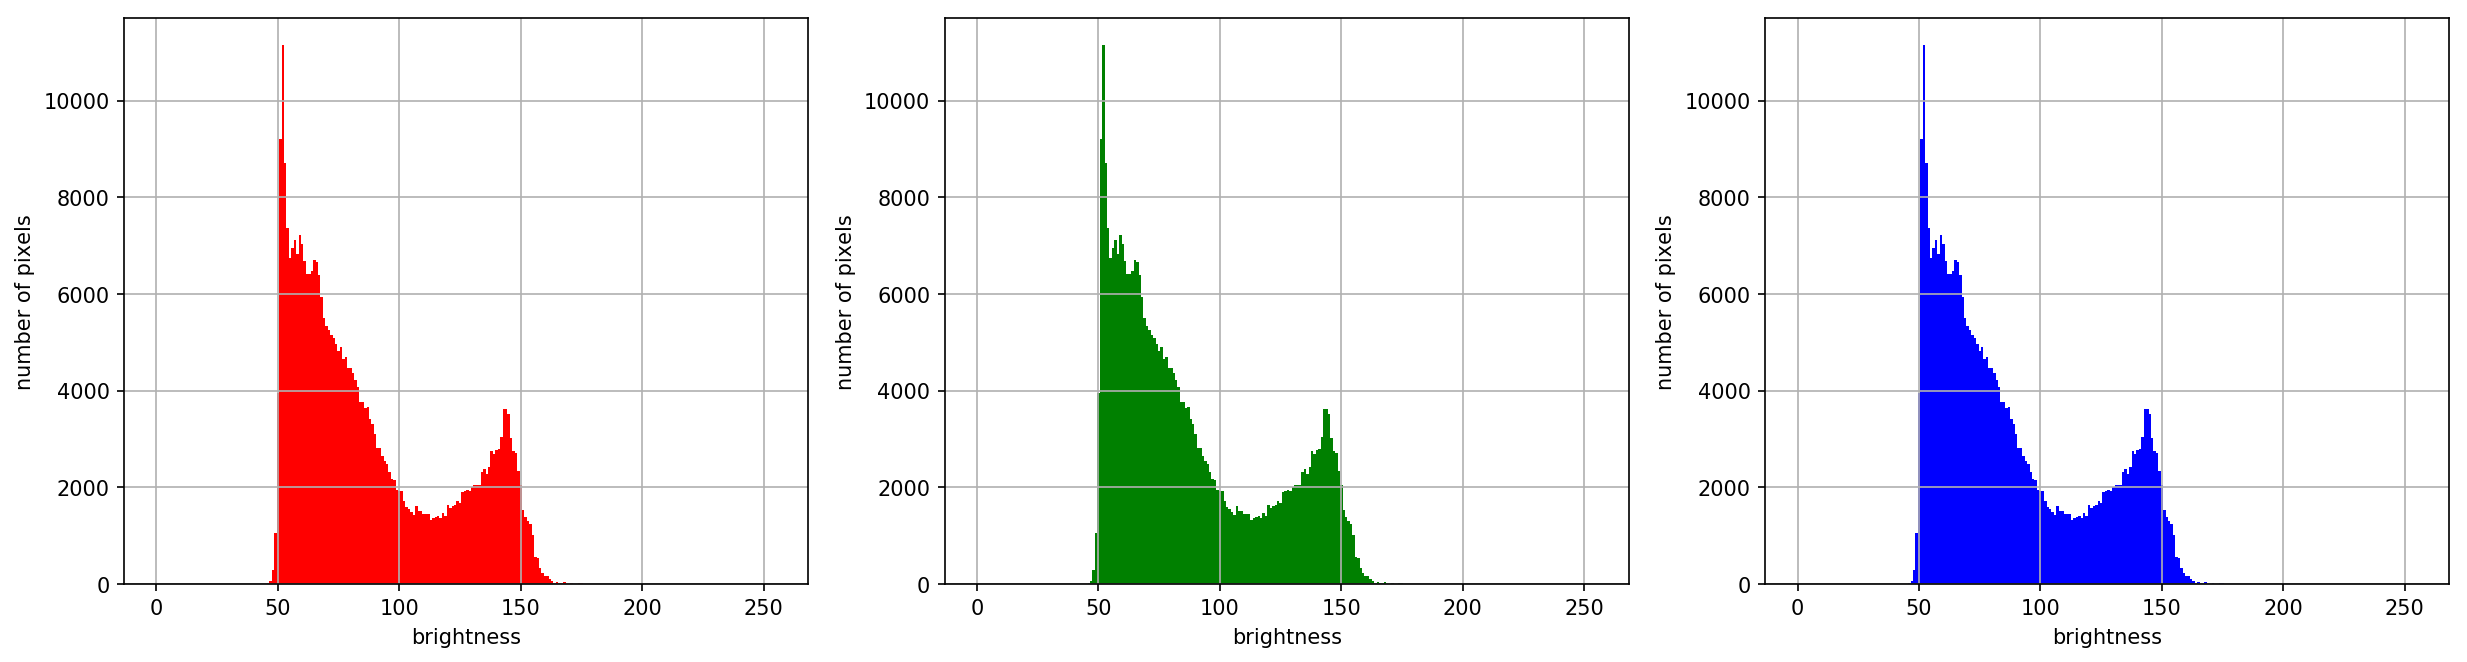

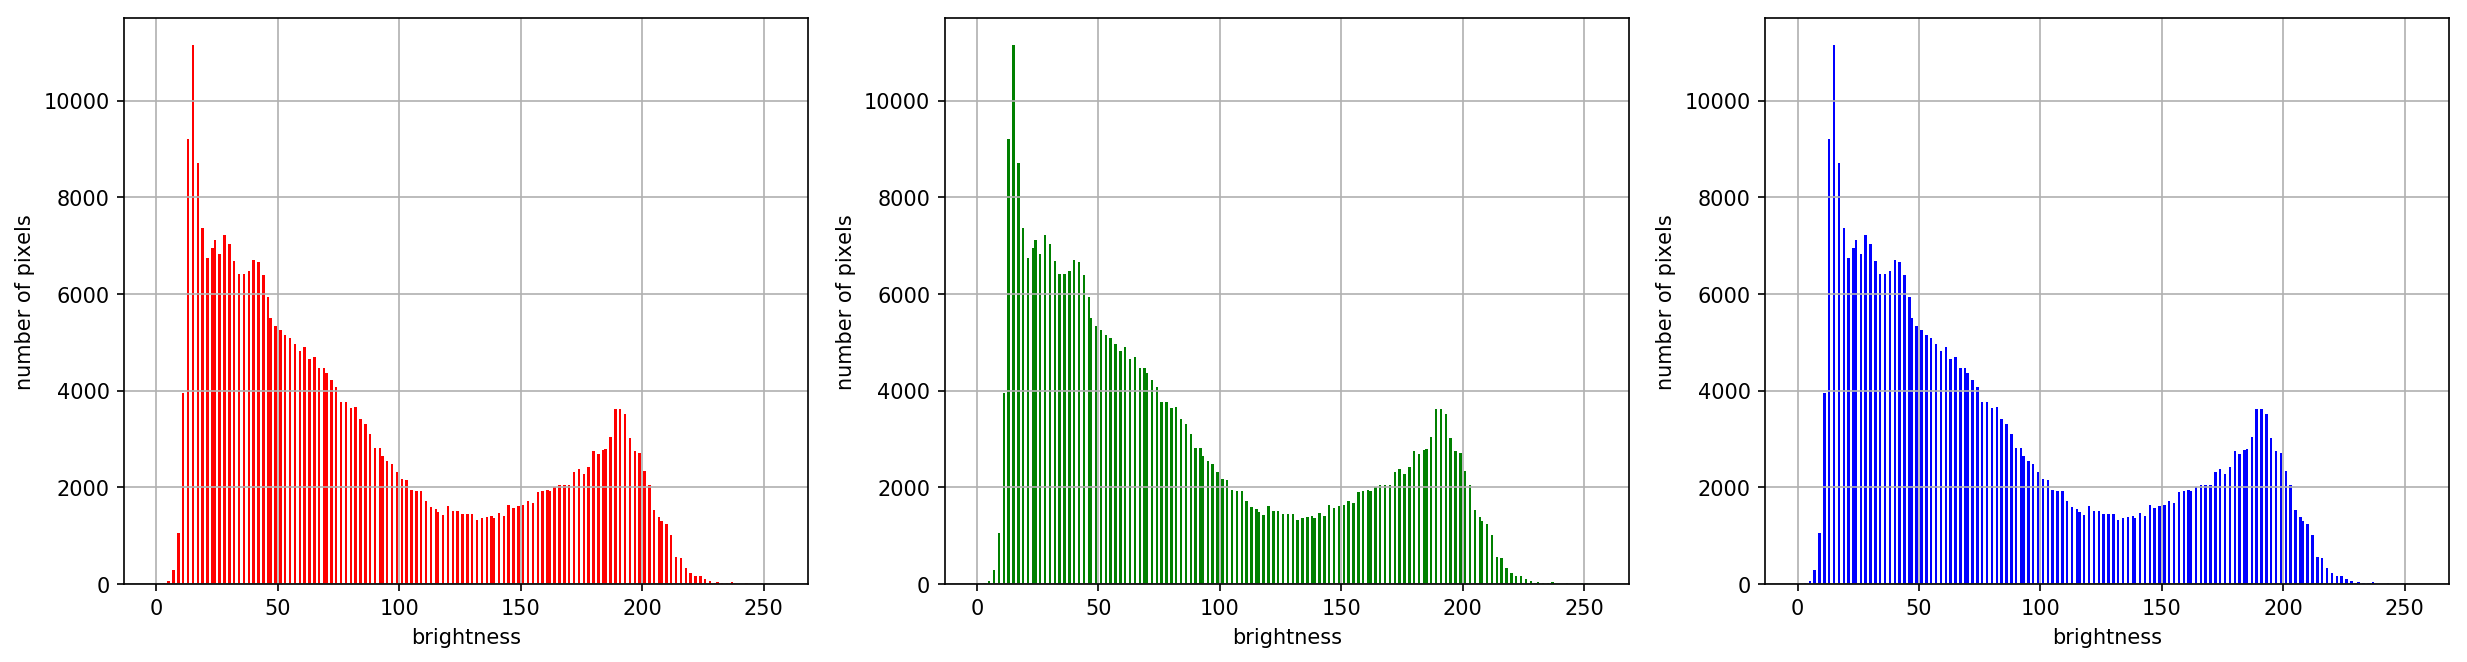

In [400]:
show_two_images((np_image_rgb, norm_img_rgb),title_arr=('Original image', 'Normalized'))
plot_hist_rgb(np_image_rgb, yscale_type='linear', title='Original')
plot_hist_rgb(norm_img_rgb, yscale_type='linear', title='Normalized')

# Эквализация

In [ ]:
def equalization(np_img, mul_const=255.0):
    image_histogram, bins = np.histogram(np_img.flatten(), number_bins, density=True)

In [226]:
def image_histogram_equalization(np_img, number_bins=256):
    histogram, bin_edges = np.histogram(
            np_img.flatten(), bins=256, range=(0, 256)
    )
    print(histogram)

In [227]:
image_histogram_equalization(np_image)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    1    6   23   99  355 1316 3067 3719 2905 2453 2250
 2321 2371 2278 2404 2346 2225 2136 2137 2161 2238 2223 2132 1980 1836
 1779 1754 1717 1699 1655 1604 1632 1551 1565 1487 1493 1455 1410 1359
 1256 1253 1216 1221 1137 1107 1035  941  938  881  850  825  771  726
  720  646  641  642  574  535  515  497  478  540  505  504  485  481
  480  444  458  460  469  457  488  470  548  523  539  547  570  560
  632  645  651  644  672  680  681  680  773  792  756  807  918  899
  926  933 1017 1204 1206 1171 1006  917  907  781  682  513  463  432
  417  340  187  177  108   73   54   56   32   20    9   13    9   10
   11    3    2    6    2    0    5    6    1    3    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

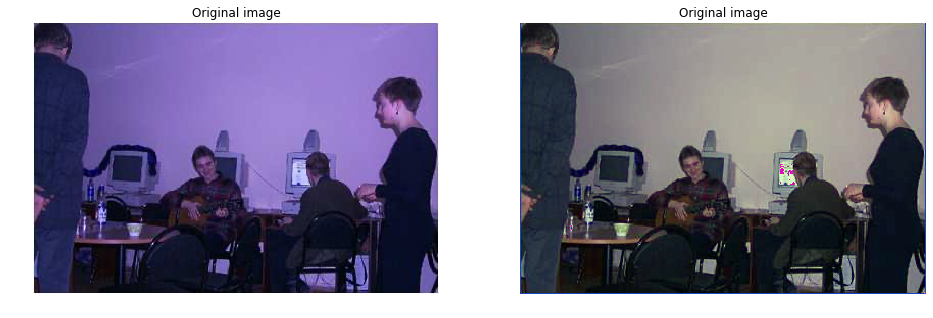

In [260]:
def show_plot(np_img):
    plt.imshow(np_img)
    plt.title('Original image')
    plt.axis('off')
    
fig=plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
show_plot(orig_image)

fig.add_subplot(1, 2, 2)
show_plot(gray_world_img)

plt.show()

TypeError: 'NoneType' object is not subscriptable